In [1]:
import os
import matplotlib.pyplot as plt
from gsvloader import polygon_to_points, loader
from glob import glob
%matplotlib inline

def get_degrees(N=72):
    # [0, 72, 144, 216, 288]
    return [k*N for k in range(int(360/N))]

### Define Subdistric Name and Street View Parameters

In [2]:
geojson_prop = {
    'PNAME': 'กรุงเทพมหานคร',
    'DNAME': 'เขตดุสิต',
    'SNAME': 'แขวงสวนจิตรลดา',
}

entry = {
    'GEOJSON_PATH': os.path.join('geojson','Bangkok-subdistricts.geojson'),
    'OUTPUT_IMAGE_PATH': os.path.join(geojson_prop['PNAME'], geojson_prop['DNAME'], geojson_prop['SNAME']),
    'width': 600,
    'height': 500,
    'degrees': get_degrees(72),
    'fov': 75,
    'pitch': -15,
    'keys': ["YOUR_API_KEY"]
}

### Get Subdistrict Polygon

['กรุงเทพมหานคร', 'แขวงสวนจิตรลดา', 'เขตดุสิต']


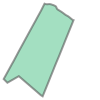

In [3]:
polygon = polygon_to_points.get_polygon(entry, geojson_prop)
polygon

### Extract coordinates along roads/streets cooresponding to the subdistrict

In [4]:
points = polygon_to_points.extract_coordinates(polygon)

converting linestrings to coordinates: 100%|██████████| 83/83 [00:01<00:00, 69.46it/s]


In [5]:
points[:5]

[[13.76291556, 100.51404888],
 [13.76263492, 100.51440066],
 [13.76235428, 100.51475244],
 [13.76207364, 100.51510422],
 [13.76179299, 100.515456]]

### Send the coordinates to the street view api to retrieve static images

In [11]:
loader.run(entry, points[0:5])

loading GSV: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


### Visualize retrieved images

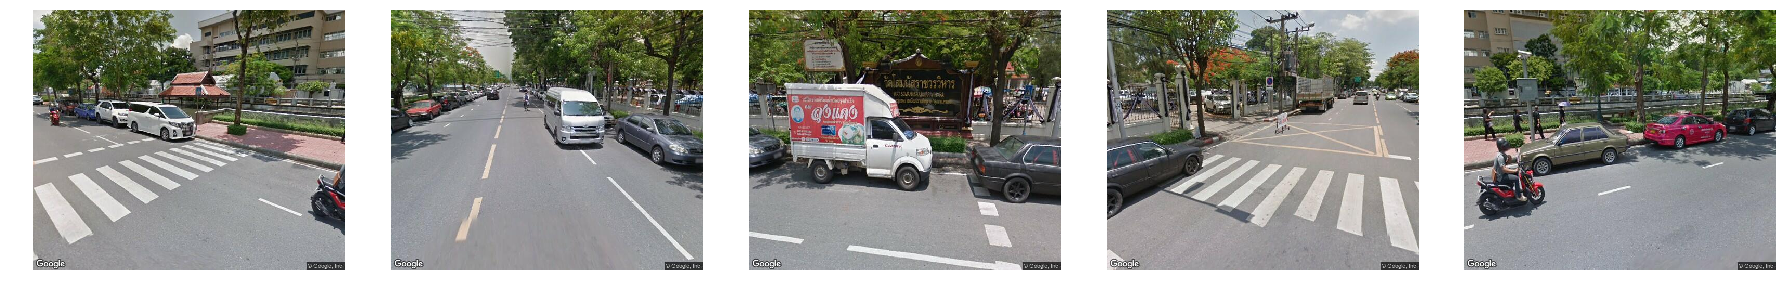

In [13]:
plt.figure(figsize=(25,15))

IMAGES = glob(os.path.join(entry['OUTPUT_IMAGE_PATH'],'*'))
IMAGES.sort()
for i, img_path in enumerate(IMAGES[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(plt.imread(img_path))
    plt.axis('off')
plt.tight_layout()
plt.show()